In [5]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import keras
# from tensorflow.python.keras.utils import image_dataset_from_directory
# from tensorflow.python.keras.applications.vgg16 import VGG16

In [6]:
dataDir = './archive/brain_tumor_dataset/'
dataset = tf.keras.utils.image_dataset_from_directory(dataDir, image_size= (224, 224))

Found 253 files belonging to 2 classes.


In [7]:
data_iterator = dataset.as_numpy_iterator()
batch = data_iterator.next()
print(len(dataset))
print(len(batch))
print(batch[0].shape)
print(batch[1].shape)

8
2
(32, 224, 224, 3)
(32,)


In [8]:
train_size = 5
valid_size = 2
test_size = 1
train = dataset.take(train_size)
valid = dataset.skip(train_size).take(valid_size)
test = dataset.skip(train_size+valid_size).take(test_size)

In [9]:
base_model = tf.keras.applications.vgg16.VGG16(include_top=False, weights='imagenet')

58889256/58889256 [==============================] - 11s 0us/step


In [10]:
base_model.traiable = False

In [11]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [24]:
from tensorflow.keras.layers import Input, Flatten, Dense
input = Input(shape=(224,224,3))
x = Rescaling(scale =1./127.5)(input)
x = base_model(x)
x = Flatten()(x)
x = Dense(units = 4096,activation='relu')(x)
x = Dense(units = 1000,activation = 'relu')(x)
output = Dense(units=1,activation = 'sigmoid')(x)
model = tf.keras.Model(input,output)

In [25]:
model.summary()


Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 rescaling_9 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 flatten_3 (Flatten)         (None, 25088)             0         
                                                                 
 dense_9 (Dense)             (None, 4096)              102764544 
                                                                 
 dense_10 (Dense)            (None, 1000)              4097000   
                                                                 
 dense_11 (Dense)            (None, 1)                 1001

In [26]:
model.compile(optimizer='adam',loss = tf.keras.losses.BinaryCrossentropy(from_logits =False),metrics =['accuracy'])

ResourceExhaustedError: {{function_node __wrapped__OneHot_device_/job:localhost/replica:0/task:0/device:CPU:0}} OOM when allocating tensor with shape[102760448,30] and type double on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu [Op:OneHot] name: 

In [39]:
history = model.fit(train,epochs =5,validation_data=valid,callbacks = tf.keras.callbacks.EarlyStopping(monitor ='accuracy',patience =2))

Epoch 1/5


5/5 [==============================] - 132s 26s/step - loss: 0.6846 - accuracy: 0.6062 - val_loss: 0.6050 - val_accuracy: 0.7188
Epoch 2/5
5/5 [==============================] - 125s 25s/step - loss: 0.7902 - accuracy: 0.6125 - val_loss: 0.6885 - val_accuracy: 0.6250
Epoch 3/5
5/5 [==============================] - 119s 24s/step - loss: 0.6850 - accuracy: 0.6313 - val_loss: 0.6516 - val_accuracy: 0.6250
Epoch 4/5
5/5 [==============================] - 110s 22s/step - loss: 0.8885 - accuracy: 0.5562 - val_loss: 0.6641 - val_accuracy: 0.6250
Epoch 5/5
5/5 [==============================] - 109s 22s/step - loss: 0.6576 - accuracy: 0.6125 - val_loss: 0.6085 - val_accuracy: 0.6094


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


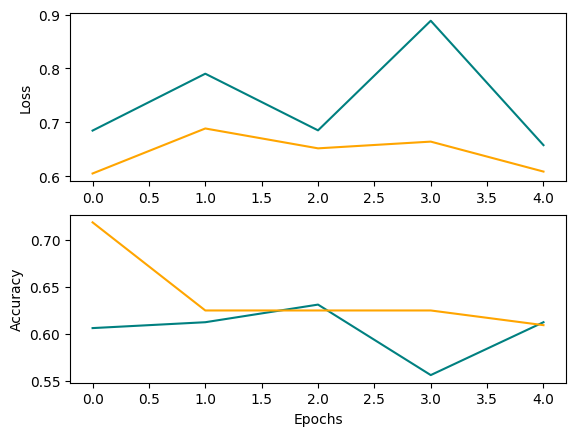

<Figure size 640x480 with 0 Axes>

In [40]:
import matplotlib.pyplot as plt
plt.subplot(2,1,1)
plt.plot(history.history['loss'],color='teal',label ='train')
plt.plot(history.history['val_loss'],color ='orange',label = 'val')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
# plt.figure().legend(loc = 'upper left')
plt.subplot(2,1,2)
plt.plot(history.history['accuracy'],color='teal',label ='train')
plt.plot(history.history['val_accuracy'],color ='orange',label = 'val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.figure().legend(loc = 'upper left')
# plt.figure().tight_layout(pad =10.0)
plt.show()

In [41]:
model.evaluate(test)

1/1 [==============================] - 4s 4s/step - loss: 0.7014 - accuracy: 0.5517


[0.7014049291610718, 0.5517241358757019]